In [8]:
import sys
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial
import PIL
import PIL.Image

#%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

np.random.seed(42) # note that you must use the same seed to ensure consistentcy in your training/validation/testing
tf.random.set_seed(42)
from sklearn.datasets import load_files 
from keras.utils import np_utils

from keras.preprocessing import image
from tqdm import tqdm

Found 8064 files belonging to 2 classes.
Using 6452 files for training.
Found 8064 files belonging to 2 classes.
Using 1612 files for validation.


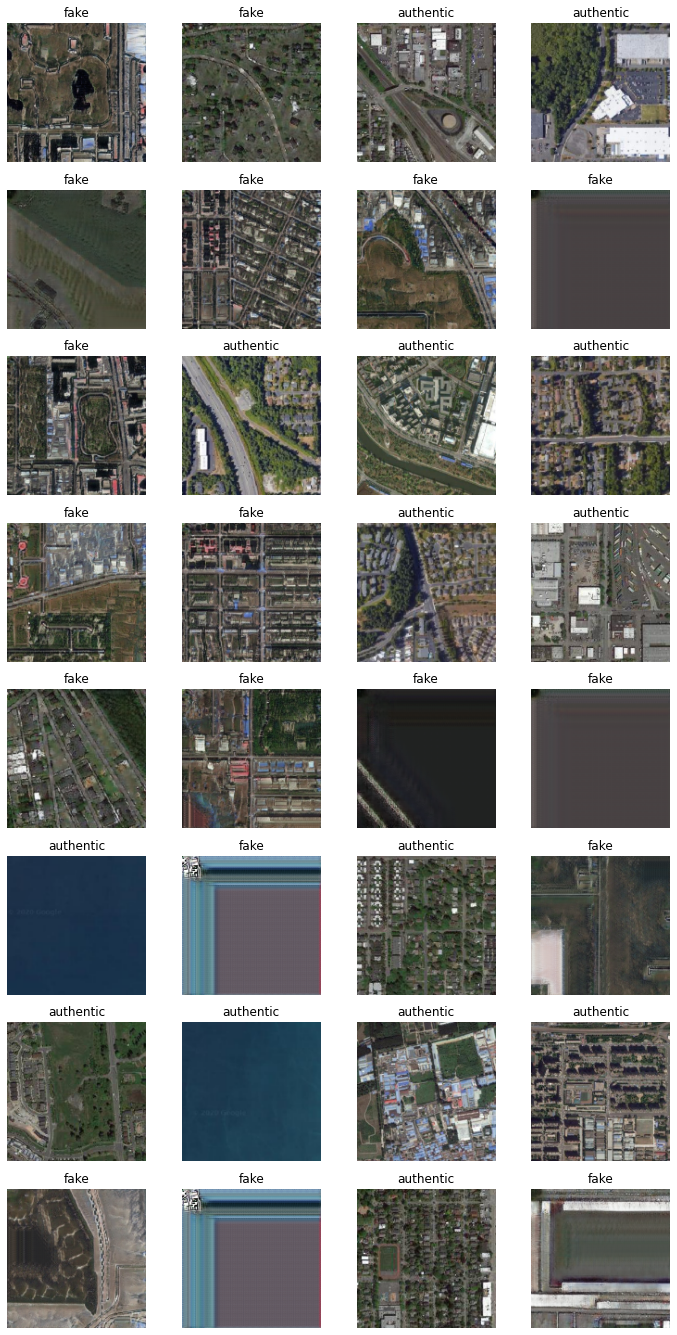

In [10]:
data_dir = "./anti-deepfake-data and code/data"
batch_size = 32;
# IMPORTANT: Depends on what pre-trained model you choose, you will need to change these dimensions accordingly
img_height = 150; 
img_width = 150;

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 42,
    image_size= (img_height, img_width),
    batch_size = batch_size
)

# Validation Dataset
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    label_mode = 'categorical',
    subset = "validation",
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)       

class_names=['authentic', 'fake']

n_rows = 8
n_cols = 4
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for images, labels in train_ds.take(1):
    for i in range (n_rows*n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(class_names[labels[i]], fontsize=12)
plt.subplots_adjust(wspace=.2, hspace=.2)

In [ ]:

gen = tf.keras.preprocessing.image.ImageDataGenerator( rotation_range=20, zoom_range=0.15,
    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
    horizontal_flip=True, fill_mode="nearest") 
train_generator = gen.flow_from_directory(directory = data_dir,
target_size=(150, 150), classes= class_names,
class_mode='categorical', batch_size=32, shuffle=True)

model = keras.models.Sequential([
    keras.layers.Conv2D(16,3,3, activation = 'softplus', padding='same', input_shape = [150,150,3]),
    keras.layers.MaxPooling2D(1),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.1),
    keras.layers.Conv2D(32,3, activation = 'softplus', padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.15),
    keras.layers.Conv2D(64,3, activation = 'softplus', padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.25),
    keras.layers.Conv2D(128, 3, activation='softplus', padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.25),
    keras.layers.Conv2D(256, 3, activation = 'softplus', padding = 'same'),
    keras.layers.MaxPooling2D(),    
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.3),
    keras.layers.Conv2D(512, 3, activation = 'softplus', padding = 'same'),
    keras.layers.MaxPooling2D(),    
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.4),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = tf.keras.layers.LeakyReLU(alpha=0.25)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation = tf.keras.layers.LeakyReLU(alpha=0.25)),
    keras.layers.Dropout(0.35),
    keras.layers.Dense(32, activation = tf.keras.layers.LeakyReLU(alpha=0.25)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation = tf.keras.layers.LeakyReLU(alpha=0.25)),
    keras.layers.Dropout(0.35),
    keras.layers.Dense(2, activation='softmax')
])

optimizer = keras.optimizers.Adam(learning_rate=.001, decay=.0008)

model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])

history = model.fit(train_generator, validation_data = validation_ds, epochs = 50, batch_size=128)


Found 8064 images belonging to 2 classes.
Epoch 1/50
252/252 [==============================] - 63s 245ms/step - loss: 0.5231 - accuracy: 0.7666 - val_loss: 0.4037 - val_accuracy: 0.8102
Epoch 2/50
252/252 [==============================] - 60s 238ms/step - loss: 0.3761 - accuracy: 0.8347 - val_loss: 1.7103 - val_accuracy: 0.6904
Epoch 3/50
252/252 [==============================] - 60s 239ms/step - loss: 0.3322 - accuracy: 0.8532 - val_loss: 0.2684 - val_accuracy: 0.9057
Epoch 4/50
252/252 [==============================] - 60s 238ms/step - loss: 0.3015 - accuracy: 0.8678 - val_loss: 0.2816 - val_accuracy: 0.8424
Epoch 5/50
252/252 [==============================] - 61s 244ms/step - loss: 0.2729 - accuracy: 0.8909 - val_loss: 0.8230 - val_accuracy: 0.7097
Epoch 6/50
252/252 [==============================] - 60s 238ms/step - loss: 0.2474 - accuracy: 0.9023 - val_loss: 0.3680 - val_accuracy: 0.8238
Epoch 7/50
252/252 [==============================] - 60s 238ms/step - loss: 0.2525 - ac